# Step 1: Import the Libraries

In [1]:
import re
import scipy
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from astropy.table import Table, Column
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Step 2 : Read , Understand and Pre Process Train/Test Data

## 2.1 Read Data

In [2]:
Train = pd.read_csv("train.csv") 
Test = pd.read_csv("test.csv")   
unenc_Train = Train.copy()
unenc_Test = Test.copy()

## 2.2 Understand the Data

In [3]:
Train

,comment_text,gender
0,r u cmng or u not cmng,Male
1,r you cmng,Female
2,"I am fine, r u fine",Male
3,m fn and you,Female
4,"my frnd is gr8, wll dn.",Male
5,my best friend is great,Female


In [4]:
print("Number of instances in Training:")
Train.index.size

Number of instances in Training:


6

In [5]:
Test

,comment_text,gender
0,"plz go out, plz out with with frnd",Male
1,"r u going to walk, r u?",Female
2,r you fine,Male
3,are you fine,Female


In [6]:
print("Number of instances in Testing:")
Test.index.size

Number of instances in Testing:


4

In [7]:
print("Comments by Male in Train Dataset:")
Train.loc[Train['gender'] == 'Male']

Comments by Male in Train Dataset:


,comment_text,gender
0,r u cmng or u not cmng,Male
2,"I am fine, r u fine",Male
4,"my frnd is gr8, wll dn.",Male


In [8]:
print("Comments by Female in Train Dataset:")
Train.loc[Train['gender'] == 'Female']

Comments by Female in Train Dataset:


,comment_text,gender
1,r you cmng,Female
3,m fn and you,Female
5,my best friend is great,Female


In [9]:
print("Comments by Male in Test Dataset:")
Test.loc[Train['gender'] == 'Male']

Comments by Male in Test Dataset:


,comment_text,gender
0,"plz go out, plz out with with frnd",Male
2,r you fine,Male


In [10]:
print("Comments by Female in Test Dataset:")
Test.loc[Train['gender'] == 'Female']

Comments by Female in Test Dataset:


,comment_text,gender
1,"r u going to walk, r u?",Female
3,are you fine,Female


In [11]:
print("Words used by male in train  dataset: ")
male_train = Train.loc[Train['gender'] == 'Male']
maleCount_Train = male_train['comment_text'].str.split(' ',expand = True).stack().value_counts()
maleCount_Train

Words used by male in train  dataset: 


u        3
cmng     2
r        2
gr8,     1
dn.      1
not      1
frnd     1
fine,    1
wll      1
I        1
my       1
am       1
is       1
or       1
fine     1
dtype: int64

In [12]:
print("Words used by male in train  dataset: ")
Female_train = Train.loc[Train['gender'] == 'Female']
FemaleCount_Train = Female_train['comment_text'].str.split(' ',expand = True).stack().value_counts()
FemaleCount_Train

Words used by male in train  dataset: 


you       2
cmng      1
and       1
r         1
m         1
my        1
best      1
is        1
great     1
friend    1
fn        1
dtype: int64

In [13]:
print("Words used by male in test  dataset: ")
male_test = Test.loc[Test['gender'] == 'Male']
maleCount_Test = male_test['comment_text'].str.split(' ',expand = True).stack().value_counts()
maleCount_Test

Words used by male in test  dataset: 


with    2
plz     2
r       1
you     1
out,    1
out     1
frnd    1
fine    1
go      1
dtype: int64

In [14]:
print("Words used by Female in test  dataset: ")
Female_test = Test.loc[Test['gender'] == 'Female']
FemaleCount_Test = Female_test['comment_text'].str.split(' ',expand = True).stack().value_counts()
FemaleCount_Test

Words used by Female in test  dataset: 


r        2
walk,    1
u?       1
going    1
to       1
you      1
u        1
fine     1
are      1
dtype: int64

Bar graph of words used by females in training set: 


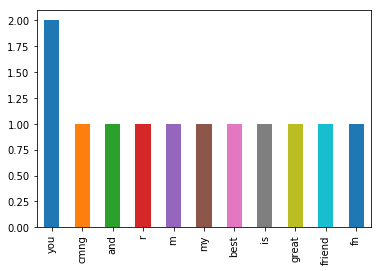

In [15]:
print("Bar graph of words used by females in training set: ")
FemaleCount_Train.plot(kind = "bar")

Bar graph of words used by Males in training set: 


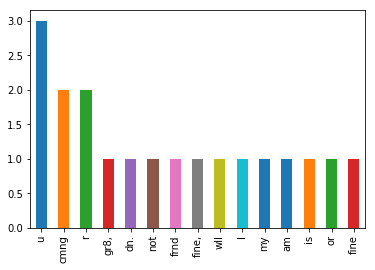

In [16]:
print("Bar graph of words used by Males in training set: ")
maleCount_Train.plot(kind = "bar")

Bar graph of words used by females in test data: 


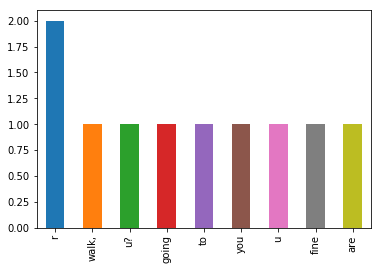

In [17]:
print("Bar graph of words used by females in test data: ")
FemaleCount_Test.plot(kind = "bar")

Bar graph of words used by Males in test data: 


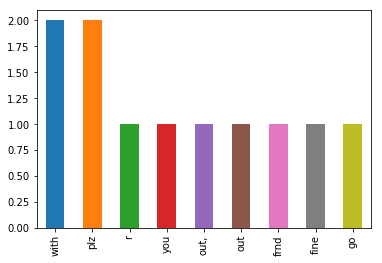

In [18]:
print("Bar graph of words used by Males in test data: ")
maleCount_Test.plot(kind = "bar")

## 2.3 : Pre Process Data

In [19]:
print("Train dataset before preprocessing:")
Train

Train dataset before preprocessing:


,comment_text,gender
0,r u cmng or u not cmng,Male
1,r you cmng,Female
2,"I am fine, r u fine",Male
3,m fn and you,Female
4,"my frnd is gr8, wll dn.",Male
5,my best friend is great,Female


In [20]:
print("Test dataset before preprocessing:")
Test

Test dataset before preprocessing:


,comment_text,gender
0,"plz go out, plz out with with frnd",Male
1,"r u going to walk, r u?",Female
2,r you fine,Male
3,are you fine,Female


In [21]:
print("Train dataset after preprocessing")
repl = lambda m: m.group(0).swapcase()
Train["comment_text"] = Train["comment_text"].str.replace(',',' ')
Train["comment_text"] = Train["comment_text"].str.replace('.',' ')
Train["comment_text"] = Train["comment_text"].str.replace('[A-Z]+',repl,regex = True)
Train["comment_text"] = Train["comment_text"].str.replace('[0-9]+'," ",regex = True)
print(Train)

Train dataset after preprocessing
              comment_text  gender
0   r u cmng or u not cmng    Male
1               r you cmng  Female
2      i am fine  r u fine    Male
3             m fn and you  Female
4  my frnd is gr   wll dn     Male
5  my best friend is great  Female


In [22]:
print("Test dataset after preprocessing")
repl = lambda m: m.group(0).swapcase()
Test["comment_text"] = Test["comment_text"].str.replace(',',' ')
Test["comment_text"] = Test["comment_text"].str.replace('.',' ')
Test["comment_text"] = Test["comment_text"].str.replace('[A-Z]+',repl,regex = True)
Test["comment_text"] = Test["comment_text"].str.replace('[0-9]+'," ",regex = True)
print(Test)

Test dataset after preprocessing
                         comment_text  gender
0  plz go out  plz out with with frnd    Male
1             r u going to walk  r u?  Female
2                          r you fine    Male
3                        are you fine  Female


# Step 3: Label encoding for test/ train data

In [23]:
gender_lbenc = LabelEncoder()

Train['gender']

0      Male
1    Female
2      Male
3    Female
4      Male
5    Female
Name: gender, dtype: object

In [24]:
Train['gender'] = gender_lbenc.fit_transform(Train['gender'])

Train['gender'] 

0    1
1    0
2    1
3    0
4    1
5    0
Name: gender, dtype: int64

In [25]:
Train

,comment_text,gender
0,r u cmng or u not cmng,1
1,r you cmng,0
2,i am fine r u fine,1
3,m fn and you,0
4,my frnd is gr wll dn,1
5,my best friend is great,0


In [26]:
Test # before encoding

,comment_text,gender
0,plz go out plz out with with frnd,Male
1,r u going to walk r u?,Female
2,r you fine,Male
3,are you fine,Female


In [27]:

Test['gender'] = gender_lbenc.fit_transform(Test['gender'])

In [28]:
Test #after encoding

,comment_text,gender
0,plz go out plz out with with frnd,1
1,r u going to walk r u?,0
2,r you fine,1
3,are you fine,0


# Step 4: Feature extraction 

In [29]:
vect = CountVectorizer( strip_accents='unicode', 
                       analyzer='word', 
                      token_pattern=r'\w{1,}',
                       stop_words='english', 
                       ngram_range=(1, 1),
                       max_features=10)
print("Parameters of Tfidf Vectorizer and its values:\n\n") 
print(vect)

Parameters of Tfidf Vectorizer and its values:


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern='\\w{1,}', tokenizer=None,
        vocabulary=None)


In [30]:
#Check Shape of features
Train_features = vect.fit_transform(Train["comment_text"])

Train_features.shape


(6, 10)

In [31]:
Test_features = vect.transform(Test["comment_text"])

print(Test_features.shape)


(4, 10)


In [32]:
feature_names = vect.get_feature_names()
feature_names

['best', 'cmng', 'dn', 'fine', 'fn', 'friend', 'frnd', 'gr', 'r', 'u']

In [33]:
print("Train features  before asigning a gender column :")
Train_feature_df = pd.DataFrame(data = Train_features.toarray() ,columns = feature_names)
Train_feature_df

Train features  before asigning a gender column :


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u
0,0,2,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,2,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0
5,1,0,0,0,0,1,0,0,0,0


In [34]:
print("Train set after assigning a gender column : ")
Train_feature_df["gender"] = Train["gender"]
Train_feature_df

Train set after assigning a gender column : 


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0


In [35]:
print("Test features before assigning a gender column :")
Test_feature_df = pd.DataFrame(data = Test_features.toarray() ,columns = feature_names)
Test_feature_df

Test features before assigning a gender column :


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,2,2
2,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0


In [36]:
print("Test set after assigning a gender column : ")
Test_feature_df["gender"] = Test["gender"]
Test_feature_df

Test set after assigning a gender column : 


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,1,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,0


In [37]:
print("Train feature shape ")
Train_feature_df.shape

Train feature shape 


(6, 11)

In [38]:
print("Test features shape after gender")
Test_feature_df.shape

Test features shape after gender


(4, 11)

# Step 5 : Train ML algorithms using Train data

In [39]:

A_train = Train_feature_df.loc[:,:'u']
B_train = Train_feature_df.loc[:,'gender']


In [40]:
A_train

,best,cmng,dn,fine,fn,friend,frnd,gr,r,u
0,0,2,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,2,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0
5,1,0,0,0,0,1,0,0,0,0


In [41]:
B_train

0    1
1    0
2    1
3    0
4    1
5    0
Name: gender, dtype: int64

In [42]:

Log_reg = LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True, 
                               intercept_scaling = 1, max_iter = 100, multi_class = 'ovr', n_jobs = 1,
                              penalty = 'l2', random_state = None, solver = 'liblinear', tol = 0.0001,
                              verbose = 0, warm_start = False)

Log_reg.fit(A_train ,B_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
random_forest = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', 
                                      max_depth = None, max_features = 'auto', max_leaf_nodes = None,
                                     min_impurity_decrease = 0.0, min_impurity_split = None,
                                    min_samples_leaf = 1, min_samples_split = 2, 
                                    min_weight_fraction_leaf = 0.0, n_estimators = 10, n_jobs = 1,
                                    oob_score = False, random_state = None, verbose = 0, 
                                    warm_start = False)



random_forest.fit(A_train,B_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
linear_SVC = LinearSVC(C = 1.0, class_weight = None, dual = True, fit_intercept = True,
                     intercept_scaling = 1, loss = 'squared_hinge', max_iter = 1000,
                     multi_class = 'ovr', penalty = 'l2', random_state = None, tol = 0.0001,
                     verbose = 0)

linear_SVC.fit(A_train,B_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
Bern_NB = BernoulliNB(alpha = 1.0, binarize = 0.0, class_prior = None, fit_prior= True)

Bern_NB.fit(A_train,B_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Step 6: Evaluate Algorithms using Test data

In [46]:
A_test = Test_feature_df.loc[:,:'u']
B_test = Test_feature_df.loc[:,'gender']

### Prediction with Logistic Regression

In [47]:
prediction = Log_reg.predict(A_test) #Predict values on the test set
print(prediction)

B_pred = gender_lbenc.inverse_transform(prediction) #Convert the labels back to unencoded form
unenc_Test['predicted gender'] = B_pred #append to the Dataframe


[1 1 1 1]


In [48]:
accuracy_log= accuracy_score(B_test,prediction)
print("Accuracy Score:",accuracy_log)

unenc_Test

Accuracy Score: 0.5


,comment_text,gender,predicted gender
0,"plz go out, plz out with with frnd",Male,Male
1,"r u going to walk, r u?",Female,Male
2,r you fine,Male,Male
3,are you fine,Female,Male


### Prediction with Rnadom Forest classifier 

In [49]:
prediction = random_forest.predict(A_test) 


B_pred = gender_lbenc.inverse_transform(prediction) 
unenc_Test['predicted gender'] = B_pred 


In [50]:
accuracy_forest = accuracy_score(B_test,prediction)
print("Accuracy Score:",accuracy_forest)
unenc_Test

Accuracy Score: 0.25


,comment_text,gender,predicted gender
0,"plz go out, plz out with with frnd",Male,Female
1,"r u going to walk, r u?",Female,Male
2,r you fine,Male,Female
3,are you fine,Female,Female


### Prediction with LinearSVC

In [51]:
prediction = linear_SVC.predict(A_test) 
B_pred = gender_lbenc.inverse_transform(prediction)
unenc_Test['predicted gender'] = B_pred 

In [52]:
accuracy_SVC = accuracy_score(B_test,prediction)
print("Accuracy Score:",accuracy_SVC)
unenc_Test

Accuracy Score: 0.25


,comment_text,gender,predicted gender
0,"plz go out, plz out with with frnd",Male,Female
1,"r u going to walk, r u?",Female,Male
2,r you fine,Male,Female
3,are you fine,Female,Female


### Prediction with Bernoulli NB :

In [53]:
prediction = Bern_NB.predict(A_test) 

B_pred = gender_lbenc.inverse_transform(prediction) 
unenc_Test['predicted gender'] = B_pred 

In [54]:
accuracy_BNB = accuracy_score(B_test,prediction)
print("Accuracy Score:",accuracy_BNB)
unenc_Test

Accuracy Score: 0.5


,comment_text,gender,predicted gender
0,"plz go out, plz out with with frnd",Male,Female
1,"r u going to walk, r u?",Female,Male
2,r you fine,Male,Male
3,are you fine,Female,Female


# Step 7: Selection of Model

In [55]:
if(accuracy_log>accuracy_forest and accuracy_SVC and accuracy_BNB):
    largest=accuracy_log
    largestName="LogisticRegression"
elif(accuracy_forest>accuracy_log and accuracy_SVC and accuracy_BNB):
    largest=accuracy_forest
    largestName="RandomForestClassifier"
elif(accuracy_SVC>accuracy_log and accuracy_forest and accuracy_BNB):
    largest=accuracy_SVC
    largestName="LinearSVC"
else:
    largest=accuracy_BNB
    largestName="BernoulliNB"
    
# Step 7: Selection of Model


pretty_table = PrettyTable()
pretty_table.field_names = ['Model', 'Accuracy']
pretty_table.add_row(['LogisticRegression', accuracy_log])
pretty_table.add_row(['RandomForestClassifier', accuracy_forest])
pretty_table.add_row(['LinearSVC',accuracy_SVC])
pretty_table.add_row(['BernoulliNB', accuracy_BNB])

print('Detailed Performance of all the Models: ')
print(pretty_table)

pretty_table = PrettyTable()
pretty_table.field_names = ['Model', 'Accuracy']
pretty_table.add_row([largestName,largest])

print('\nBest Model: ')
print(pretty_table)

Detailed Performance of all the Models: 
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.5    |
| RandomForestClassifier |   0.25   |
|       LinearSVC        |   0.25   |
|      BernoulliNB       |   0.5    |
+------------------------+----------+

Best Model: 
+--------------------+----------+
|       Model        | Accuracy |
+--------------------+----------+
| LogisticRegression |   0.5    |
+--------------------+----------+


# Step : 8 Application Phase 

## 8.1 : Combine Data

In [56]:
print("Train Set")
Train_feature_df

Train Set


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0


In [57]:
print("Test Set")
Test_feature_df

Test Set


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,2,2,0
2,0,0,0,1,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,0


In [58]:
Complete_Dataset = Train_feature_df.append(Test_feature_df,ignore_index= True)
Complete_Dataset


,best,cmng,dn,fine,fn,friend,frnd,gr,r,u,gender
0,0,2,0,0,0,0,0,0,1,2,1
1,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,2,0,0,0,0,1,1,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,1
5,1,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,2,2,0
8,0,0,0,1,0,0,0,0,1,0,1
9,0,0,0,1,0,0,0,0,0,0,0


In [59]:
Complete_A = Complete_Dataset.loc[:,:'u']
Complete_B = Complete_Dataset['gender']

## 8.2 : Train best model on all data

In [60]:
random_forest.fit(Complete_A,Complete_B)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Step 9 : Make Predictions on Unseen data 

In [61]:
Text = input("Please enter The text: ")


Please enter The text: plz go out, plz out with with frnd


In [62]:
data = {'comment_text':[Text]}
feature_vector = pd.DataFrame(data)

In [63]:
print("Feature Vector before encoding:" )
feature_vector


Feature Vector before encoding:


,comment_text
0,"plz go out, plz out with with frnd"


In [64]:
# PreProcess the input taken from user 

In [65]:
repl = lambda m: m.group(0).swapcase()
feature_vector["comment_text"] = feature_vector["comment_text"].str.replace(',',' ')
feature_vector["comment_text"] = feature_vector["comment_text"].str.replace('?',' ')
feature_vector["comment_text"] = feature_vector["comment_text"].str.replace('[A-Z]+',repl,regex = True)
feature_vector["comment_text"] = feature_vector["comment_text"].str.replace('[0-9]+'," ",regex = True)

In [66]:
feature_vector


,comment_text
0,plz go out plz out with with frnd


In [67]:
feature_vectors_enc = vect.transform(feature_vector['comment_text'])

In [68]:
print("Feature Vector after encoding")
print(feature_vectors_enc.toarray())


Feature Vector after encoding
[[0 0 0 0 0 0 1 0 0 0]]


## 9.4 Prediction 

In [69]:
result = random_forest.predict(feature_vectors_enc)

In [70]:
Final_result = gender_lbenc.inverse_transform(result)

In [71]:
print (Final_result)

['Male']
